### Reference Information

This Jupyter Notebook provides an analysis of stroke prediction.

 This dataset can be acquired from this link https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Overview

#### Problem Domain

In this Bayesian Classification analysis, the overarching objective is to gain insights into the likelihood of stroke occurrence in patients within the context of healthcare. Stroke is a significant global health concern, ranking as the second leading cause of death worldwide, responsible for approximately 11% of total fatalities according to the World Health Organization (WHO). 

This dataset serves as a microcosm of the kind of information that can be gathered in attempts to better understand the trends and factors associated with stroke occurrences. By associating these attributes with individual health records, we are employing Bayesian Classification as a tool to delve deeper into this specific healthcare problem. This analysis aims to uncover potential connections between these patient attributes and the likelihood of experiencing a stroke, contributing to our broader understanding of stroke risk factors and prevention strategies.

#### Objective

Our primary objective is to understand the factors influencing stroke occurrence in patients based on a healthcare dataset. We will leverage Python programming along with libraries such as Pandas, NumPy, Matplotlib, and Seaborn to conduct a comprehensive exploration of the dataset. 

We will conduct a thorough examination of the dataset, including the calculation of statistics, visualization of attribute distributions, and the identification of potential outliers. The Bayesian Classification modeling technique will play a pivotal role in addressing these questions. Specifically, we will use Bayesian Classification for binary classification, focusing on whether a patient is likely to experience a stroke or not.

Ultimately, this analysis aims to shed light on the interplay between various patient characteristics and the probability of stroke occurrence, contributing to our understanding of stroke risk factors and providing insights for preventive healthcare measures. 

### Import Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Setting initial Configuration

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

### Data Ingestion & Initial Inspection

In [3]:
#When importing 
df = pd.read_csv('/Users/yen/Desktop/healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.shape

(5110, 12)

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Check for Missing Values

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Drop the ID  Field

In [11]:
df = df.drop(['id'], axis=1)

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Exploratory Data Analysis

In [13]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
#Summary statistics for all values
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [15]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [16]:
#Summary statistics with additional percentiles
df.describe(percentiles=[0.01,0.05,0.1,0.9,0.99,0.995])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
1%,1.080000,0.000000,0.000000,56.330900,15.100000,0.000000
5%,5.000000,0.000000,0.000000,60.713500,17.640000,0.000000
10%,11.000000,0.000000,0.000000,65.789000,19.700000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
90%,75.000000,0.000000,0.000000,192.181000,38.900000,0.000000
99%,82.000000,1.000000,1.000000,240.708200,53.400000,1.000000


### Corelation Analysis

In [17]:
df.corr()

/var/folders/6v/wspqc6dj0rg2zx29p84jkbqc0000gn/T/ipykernel_1076/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### Correlation between categorical fields and dependent variable based on p-value

In [24]:
from scipy.stats import chi2_contingency

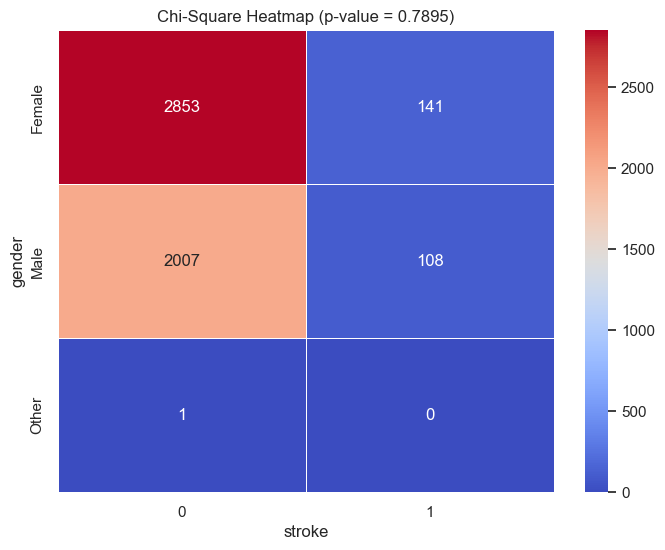

In [25]:
# Assuming you have a DataFrame 'df' with your data
# 'CategoricalColumn' is the categorical predictor
# 'DependentVariable' is the categorical dependent variable

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['stroke'])

# Calculate the Chi-Square statistic for the contingency table
chi2, p, _, _ = chi2_contingency(contingency_table)

# Create a heatmap of the Chi-Square statistic
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title(f'Chi-Square Heatmap (p-value = {p:.4f})')
plt.xlabel('stroke')
plt.ylabel('gender')
plt.show()


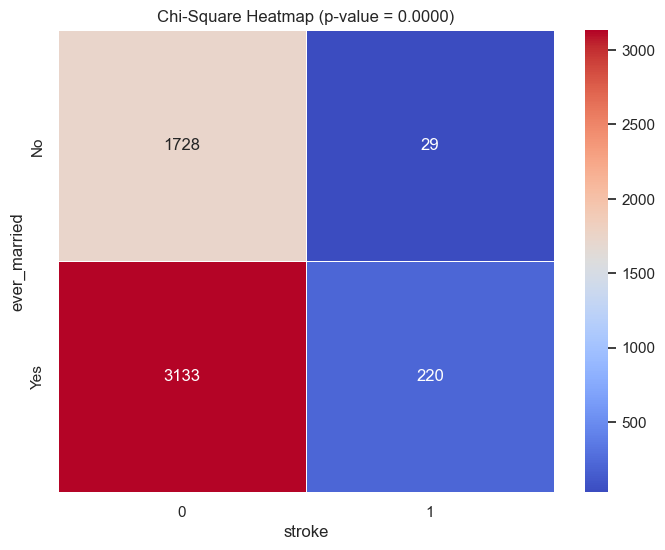

In [26]:
contingency_table = pd.crosstab(df['ever_married'], df['stroke'])

# Calculate the Chi-Square statistic for the contingency table
chi2, p, _, _ = chi2_contingency(contingency_table)

# Create a heatmap of the Chi-Square statistic
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title(f'Chi-Square Heatmap (p-value = {p:.4f})')
plt.xlabel('stroke')
plt.ylabel('ever_married')
plt.show()

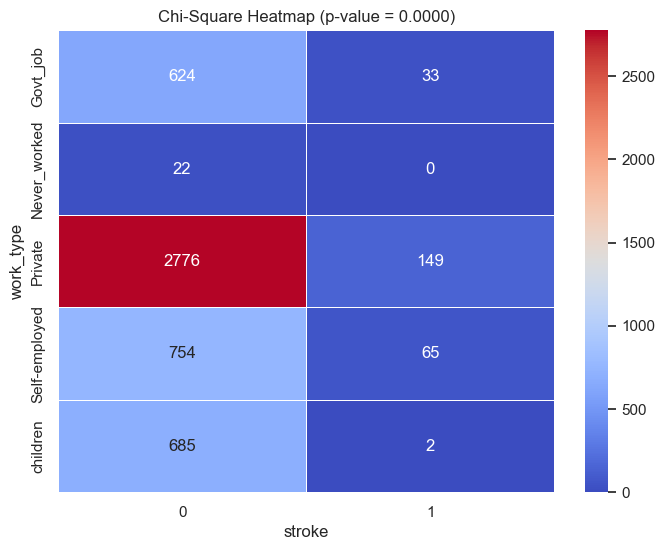

In [27]:
contingency_table = pd.crosstab(df['work_type'], df['stroke'])

# Calculate the Chi-Square statistic for the contingency table
chi2, p, _, _ = chi2_contingency(contingency_table)

# Create a heatmap of the Chi-Square statistic
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title(f'Chi-Square Heatmap (p-value = {p:.4f})')
plt.xlabel('stroke')
plt.ylabel('work_type')
plt.show()

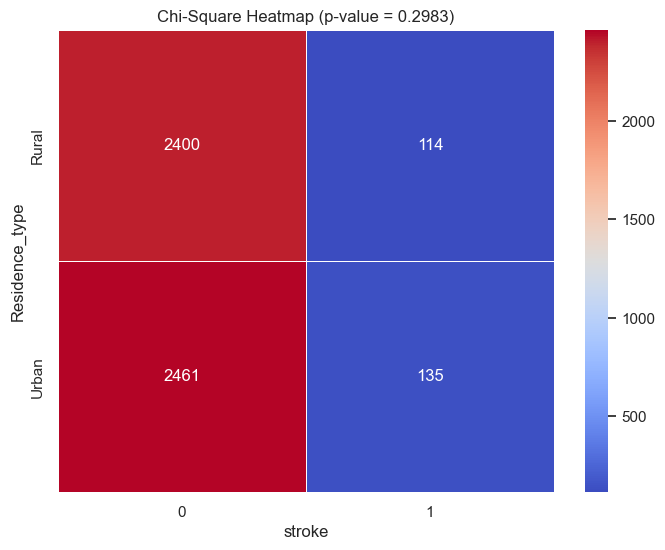

In [28]:
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

# Calculate the Chi-Square statistic for the contingency table
chi2, p, _, _ = chi2_contingency(contingency_table)

# Create a heatmap of the Chi-Square statistic
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title(f'Chi-Square Heatmap (p-value = {p:.4f})')
plt.xlabel('stroke')
plt.ylabel('Residence_type')
plt.show()

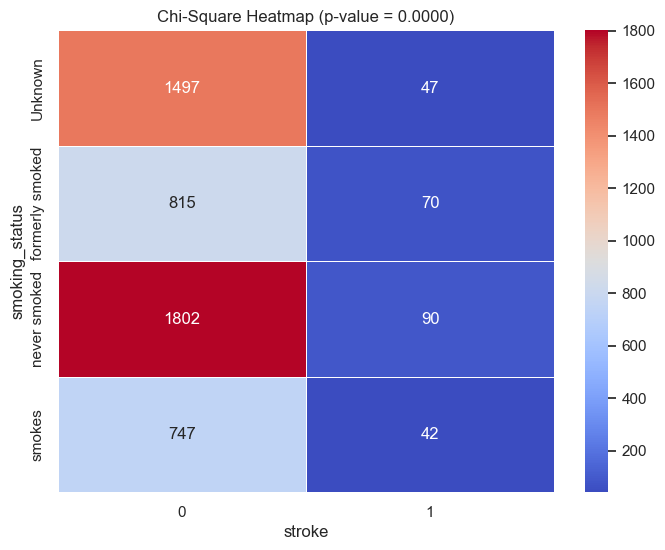

In [29]:
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

# Calculate the Chi-Square statistic for the contingency table
chi2, p, _, _ = chi2_contingency(contingency_table)

# Create a heatmap of the Chi-Square statistic
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title(f'Chi-Square Heatmap (p-value = {p:.4f})')
plt.xlabel('stroke')
plt.ylabel('smoking_status')
plt.show()

If the p-value for a correlation coefficient is exactly 0 (p = 0), it typically indicates that there is an extremely strong and statistically significant correlation between the two variables being analyzed. In other words, a p-value of 0 suggests that the observed correlation in the data is highly unlikely to have occurred by random chance alone, and it provides strong evidence that there is a real and significant relationship between the variables.



Null Hypothesis (H0): The null hypothesis, in this context, would typically be that there is no association or correlation between gender and the occurrence of strokes. It assumes that gender has no effect on stroke risk.

P-Value = 0.7: A p-value of 0.7 is relatively large. It means that if the null hypothesis were true (i.e., if there were no true association between gender and stroke), there is a 70% chance of observing the data or data more extreme (in terms of the association between gender and stroke) purely by random variation.

Interpretation: Since the p-value is high (0.7), you would typically fail to reject the null hypothesis. In practical terms, this suggests that, based on the available data and the statistical analysis conducted, there is insufficient evidence to conclude that there is a significant correlation between gender and the occurrence of strokes. The results do not support the idea that gender is a statistically significant predictor of stroke risk in this dataset.

It's important to note that while a p-value of 0.7 suggests no statistical significance, the absence of a significant correlation in the dataset does not necessarily imply a lack of real-world association between gender and stroke risk. Other factors may be at play, and larger datasets or more refined statistical analyses may be needed to detect any potential relationships. Additionally, when interpreting p-values, it's essential to consider the significance level (alpha) and the specific context of the analysis.

### Plot Corelation for in a Heatmap

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})

/var/folders/6v/wspqc6dj0rg2zx29p84jkbqc0000gn/T/ipykernel_1076/3200040090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot = True,cmap = 'coolwarm')


<Axes: >

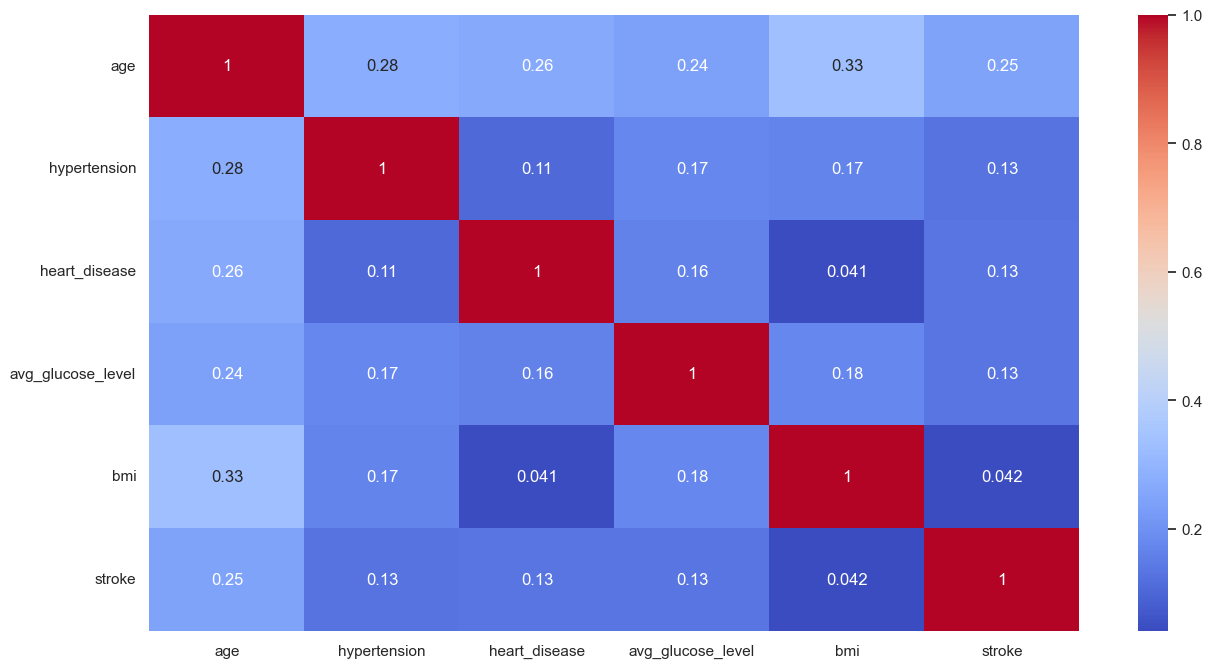

In [31]:
sns.heatmap(df.corr().abs(), annot = True,cmap = 'coolwarm')

### Data Visualization

In [32]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Categotical Variables

In [34]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

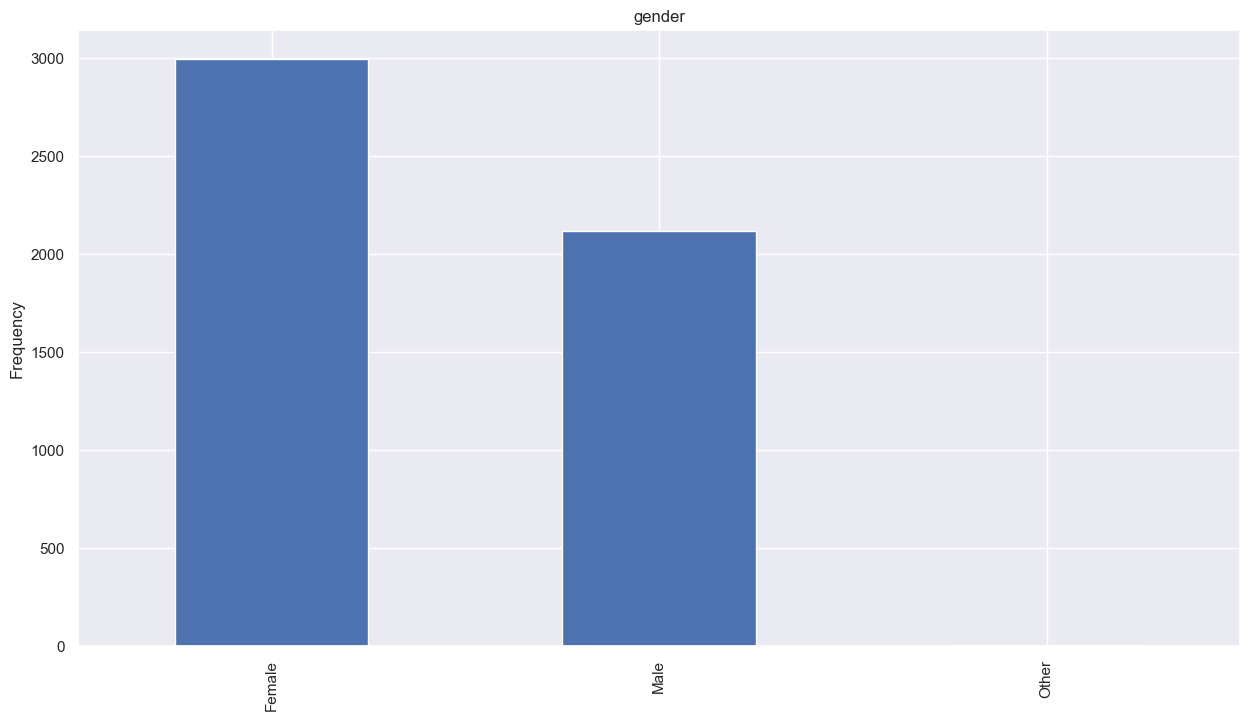

In [35]:
df['gender'].value_counts().plot(kind='bar',ylabel = 'Frequency', title='gender')
plt.show()

In [36]:
# PIE CHART
#df['gender'].value_counts().plot(kind='pie',ylabel ="", title='gender', autopct = '%1.1f%',startangle=90)
#plt.show()

In [37]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

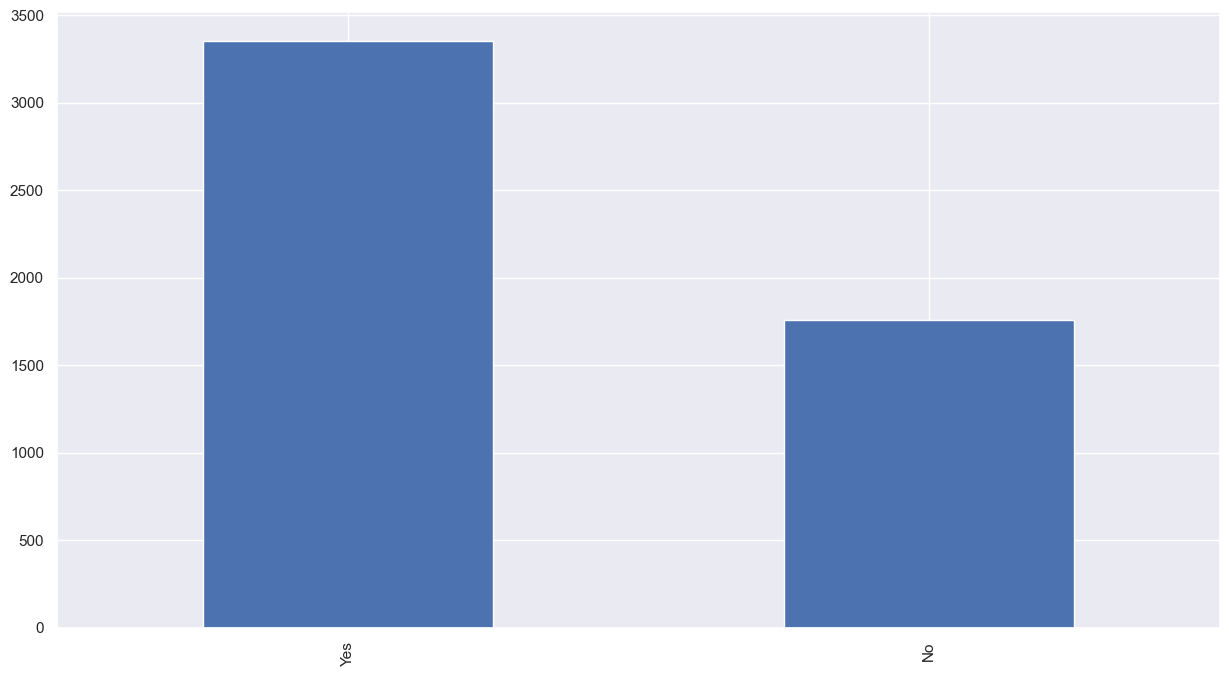

In [38]:
df['ever_married'].value_counts().plot(kind='bar')
plt.show()

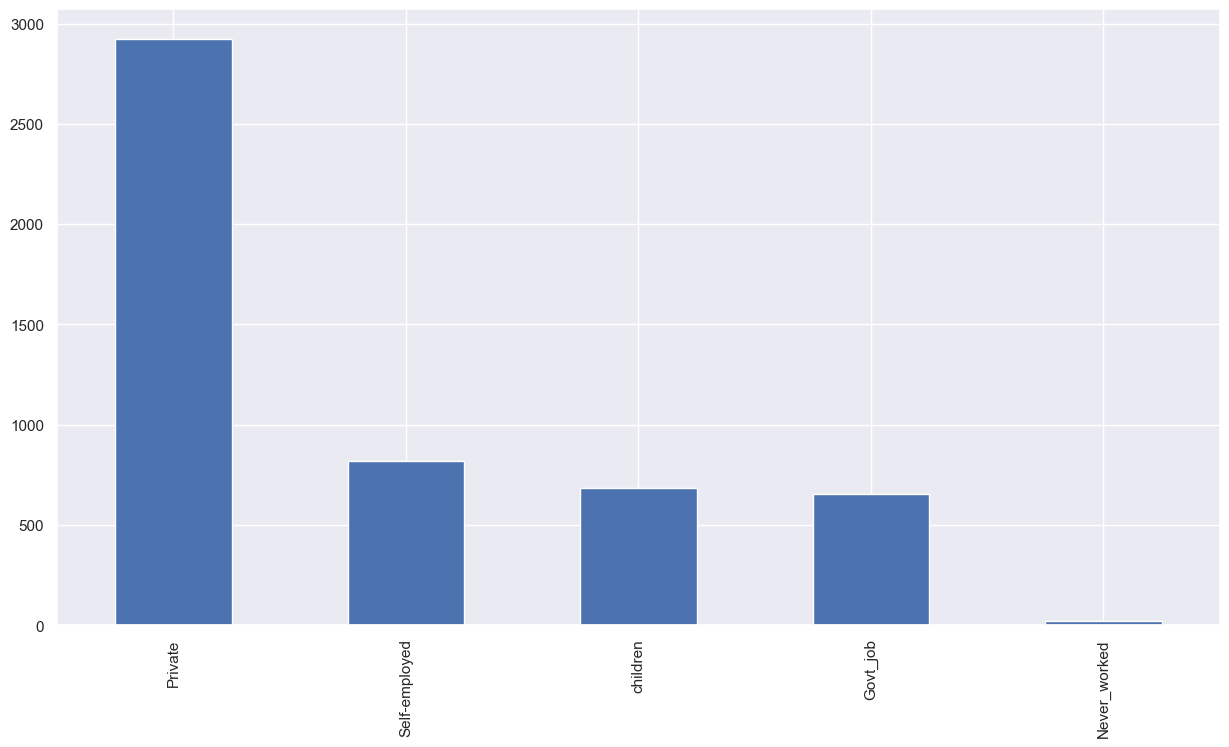

In [39]:
df['work_type'].value_counts().plot(kind='bar')
plt.show()

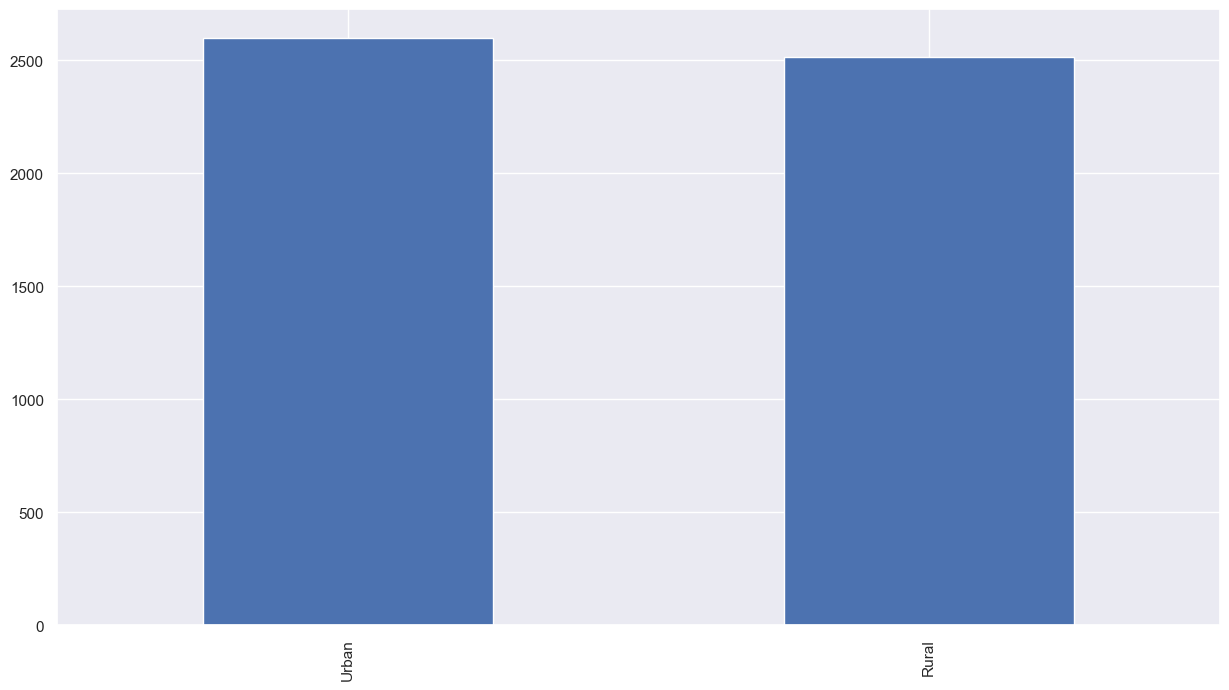

In [42]:
df['Residence_type'].value_counts().plot(kind='bar')
plt.show()

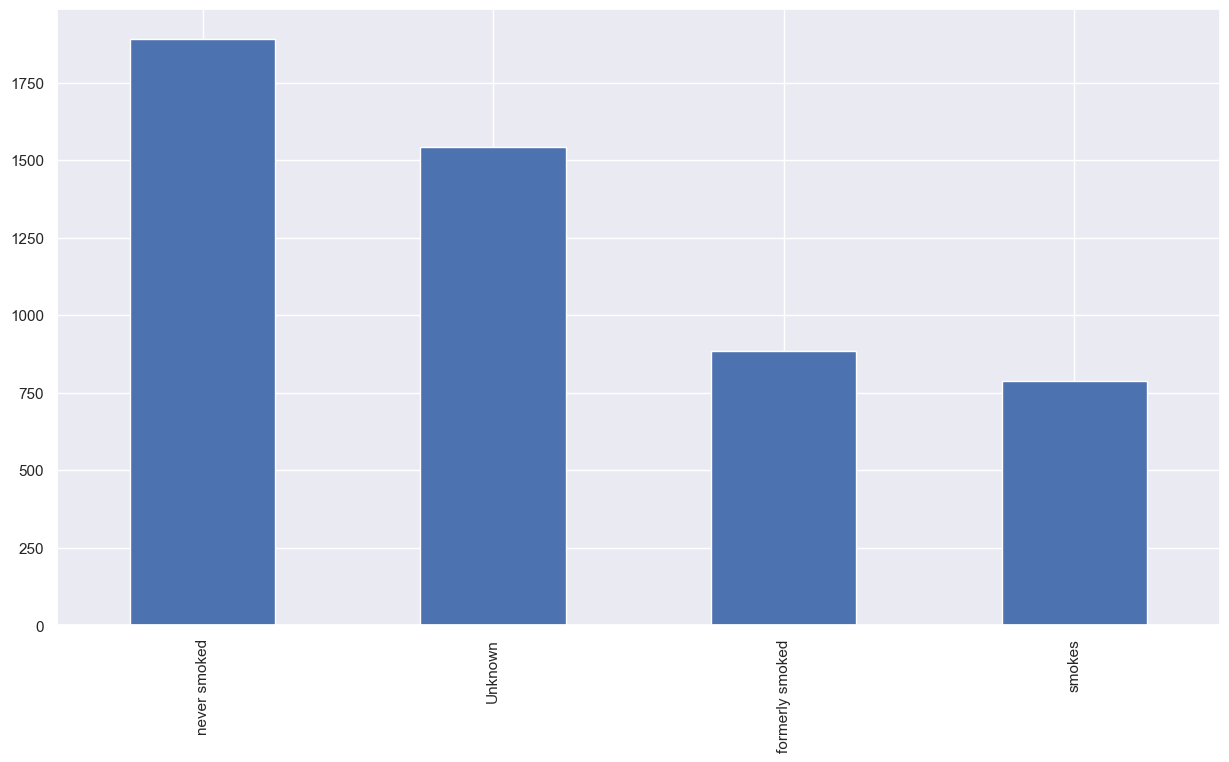

In [43]:
df['smoking_status'].value_counts().plot(kind='bar')
plt.show()

### Numerical Values

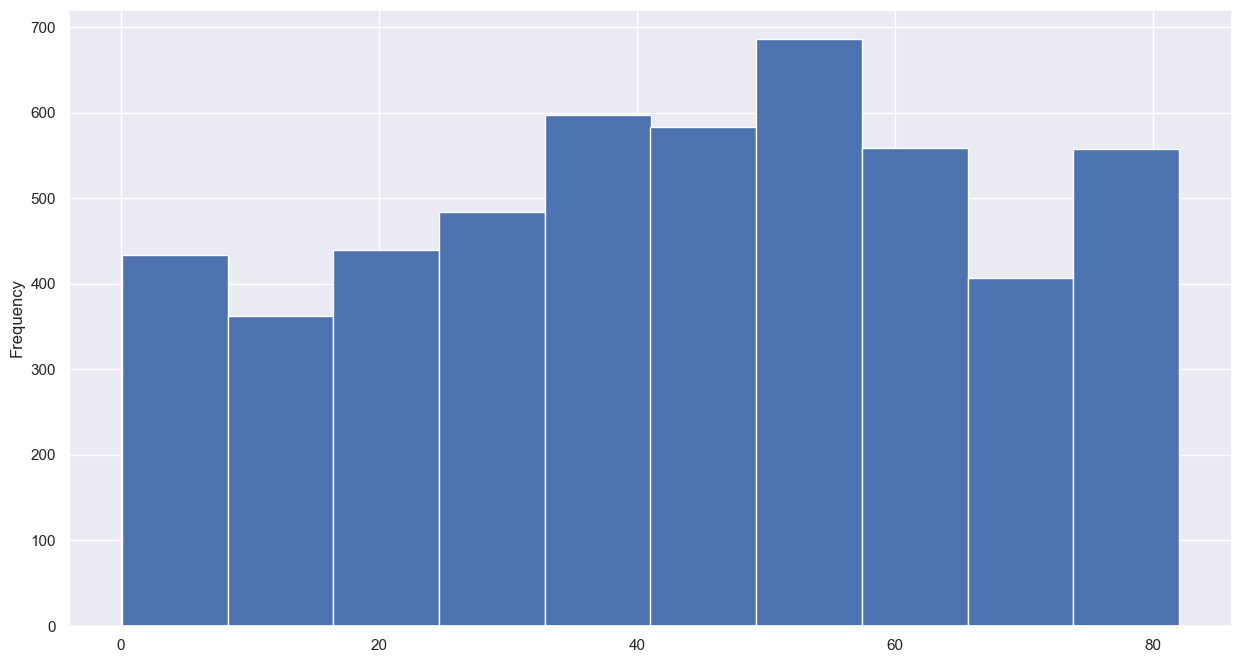

In [44]:
df['age'].plot(kind='hist')
plt.show()

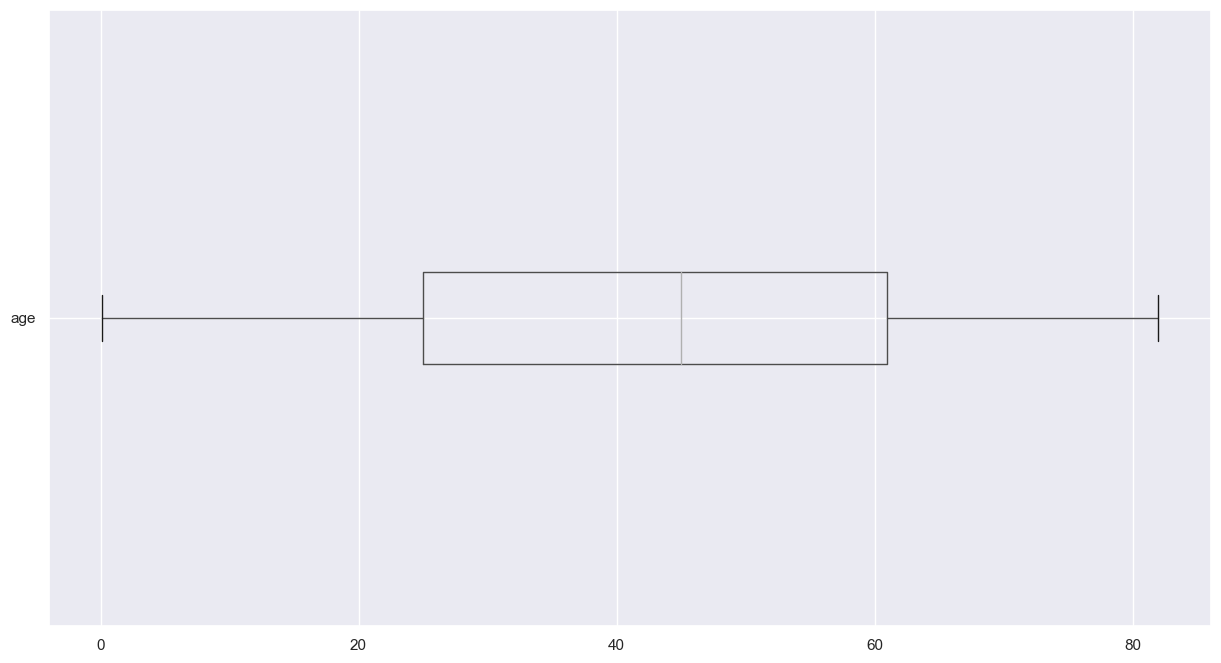

In [45]:
df.boxplot(column = 'age', vert =False)
plt.show()

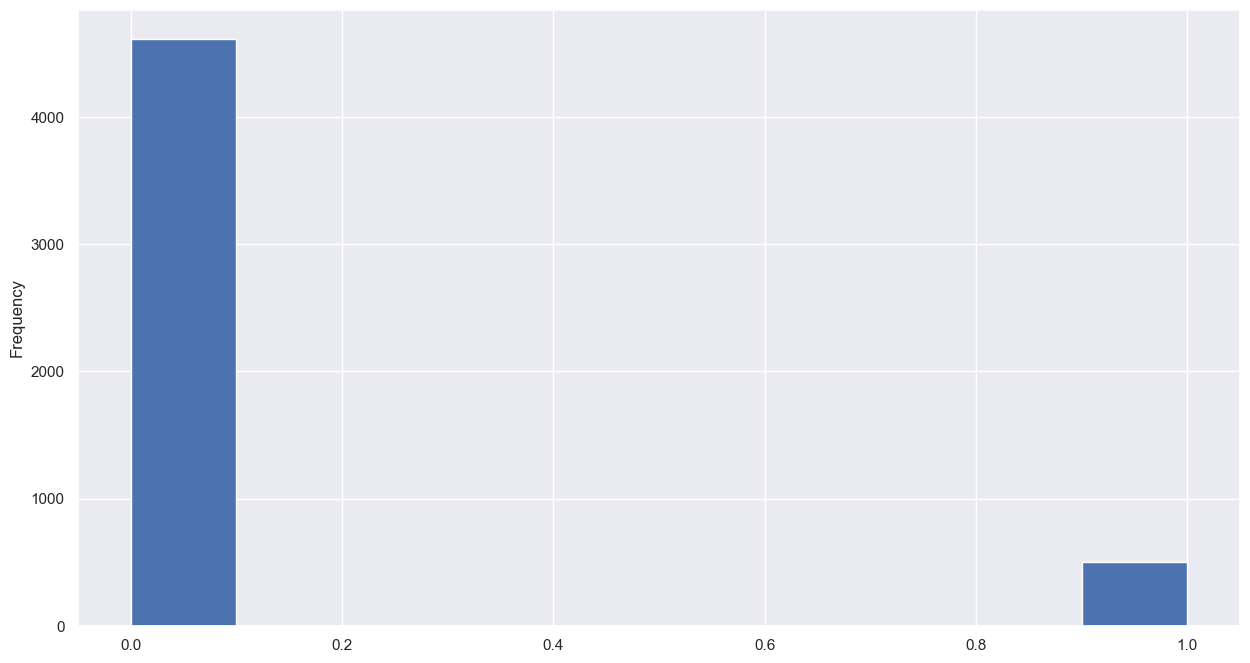

In [46]:
df['hypertension'].plot(kind='hist')
plt.show()

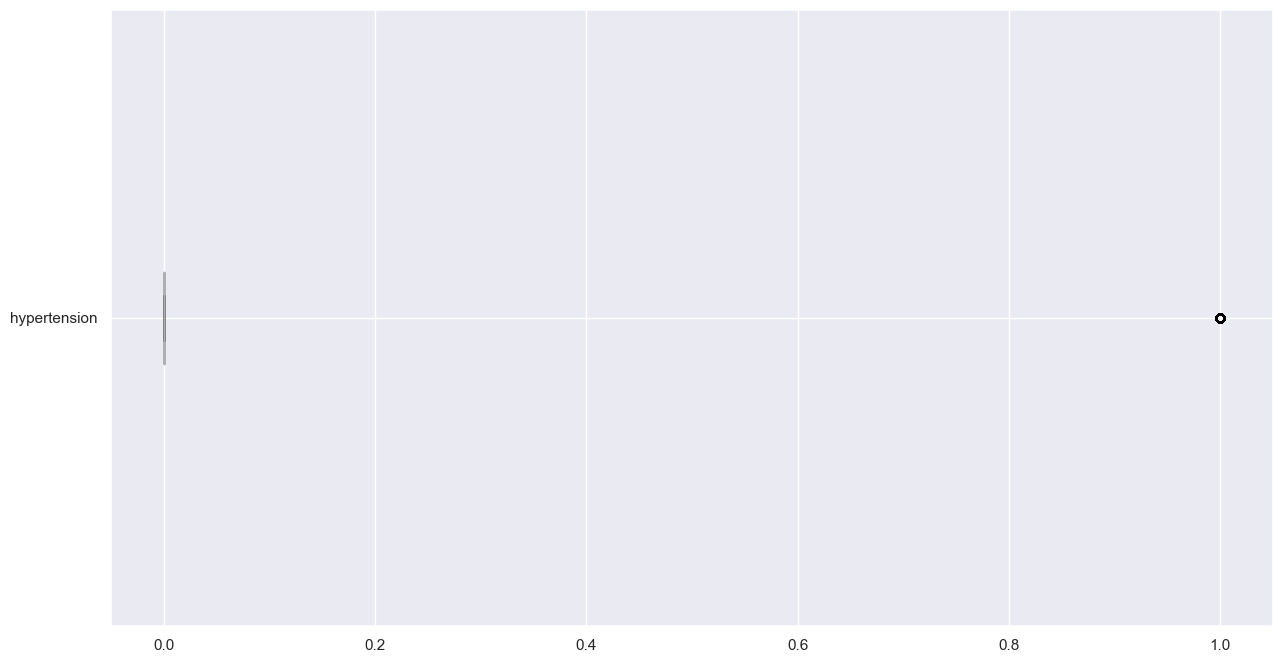

In [47]:
df.boxplot(column = 'hypertension', vert =False)
plt.show()

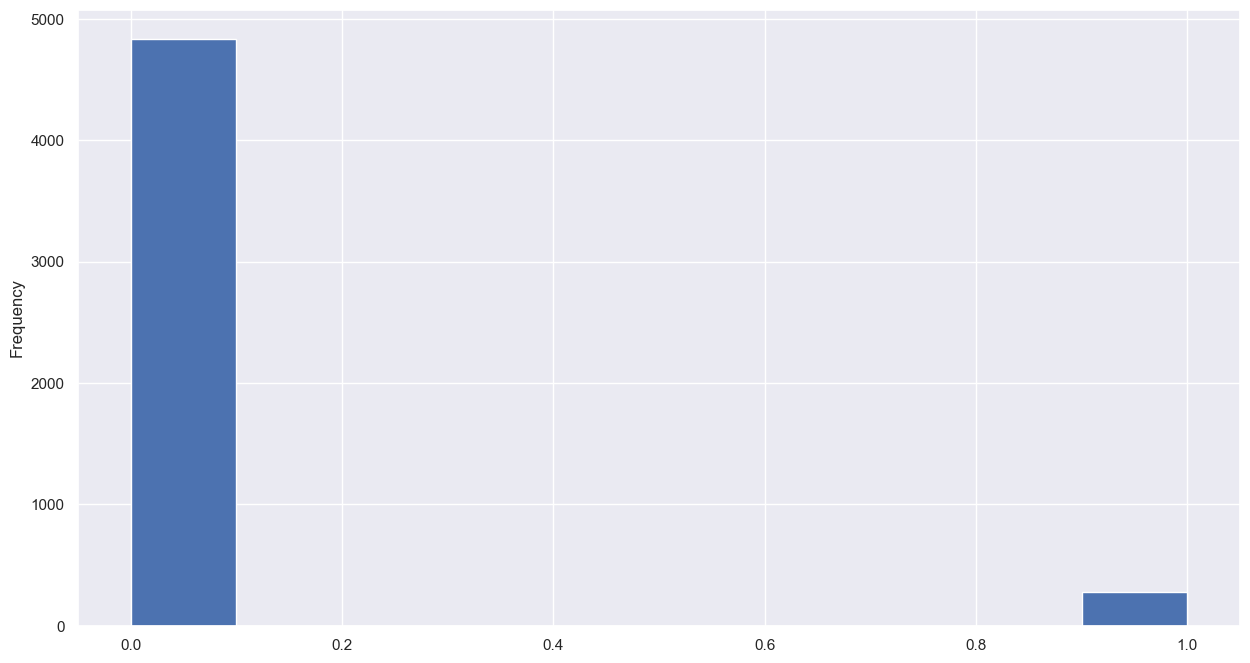

In [48]:
df['heart_disease'].plot(kind='hist')
plt.show()

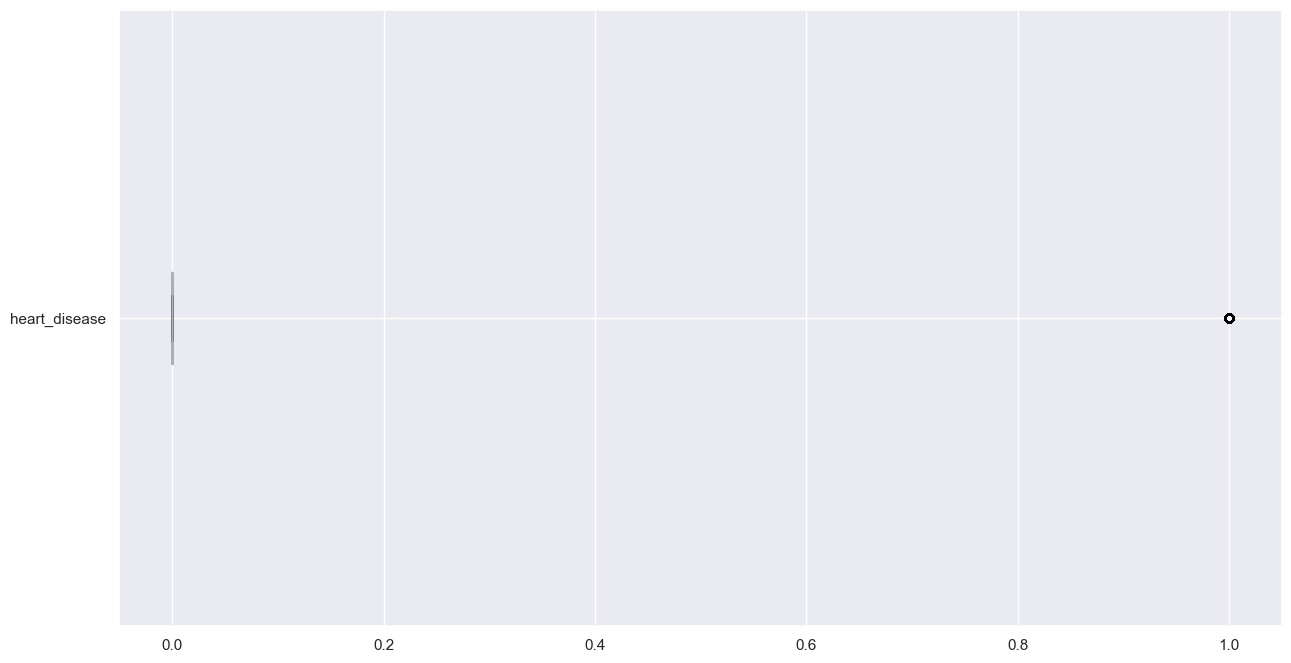

In [49]:
df.boxplot(column = 'heart_disease', vert =False)
plt.show()

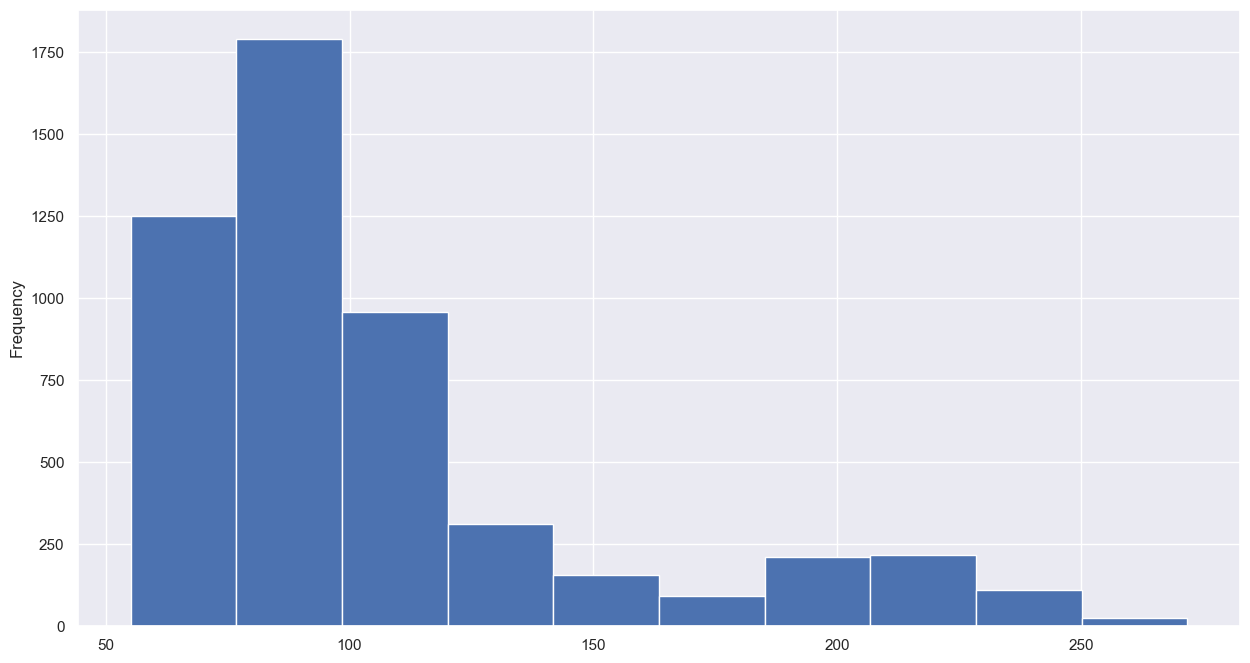

In [50]:
df['avg_glucose_level'].plot(kind='hist')
plt.show()

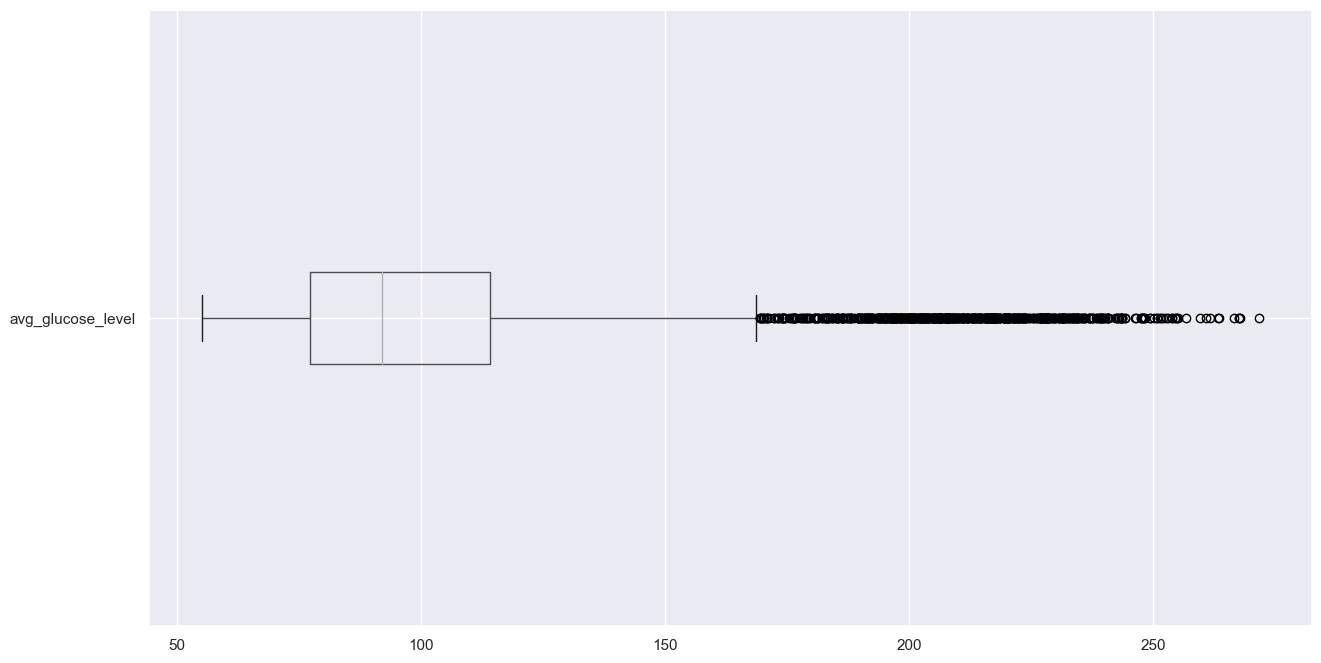

In [51]:
df.boxplot(column = 'avg_glucose_level', vert =False)
plt.show()

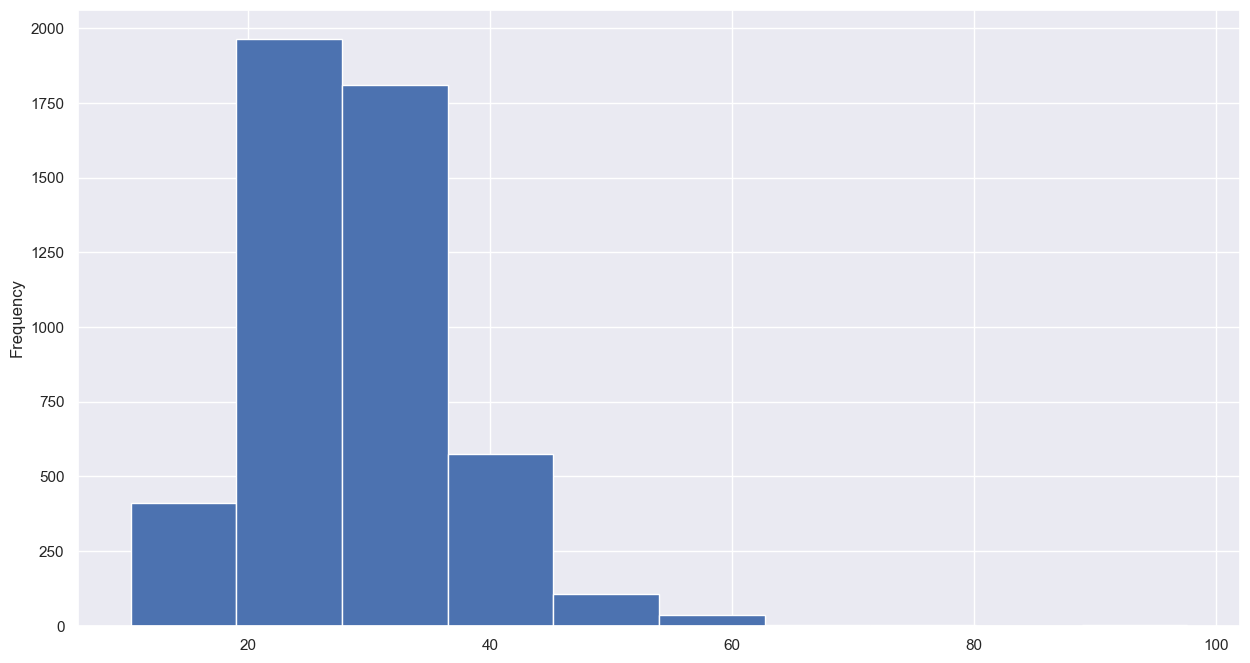

In [52]:
df['bmi'].plot(kind='hist')
plt.show()

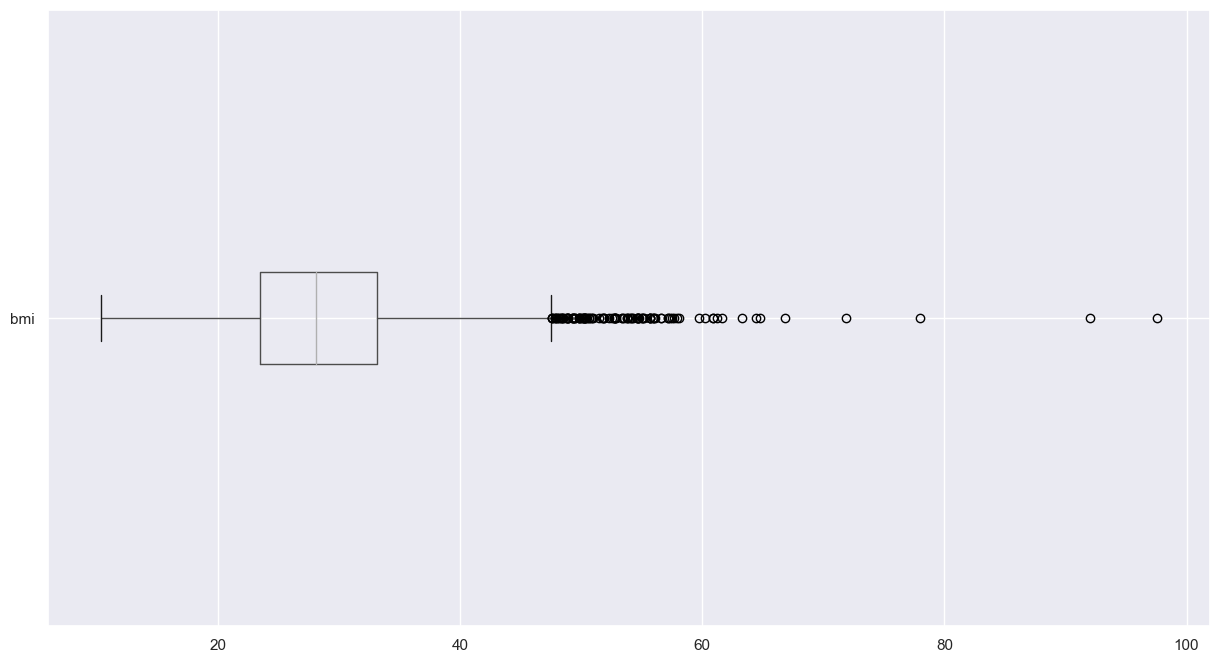

In [53]:
df.boxplot(column = 'bmi', vert =False)
plt.show()

### Data Preprocessing

#### Replace Missing Values

In [54]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [55]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [56]:
# Use mode for categorical variables
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace = True) # start at row 0 column 0

In [57]:
# Use mean for numerical variable or median if there are strong outliners
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace = True)

In [58]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Handling Outliner

In [59]:
# Define a function to replace outliers with the median
def handle_outliners(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(lower_bound)
    print(upper_bound)
    
    print("Original shape: ")
    print(df.shape)
    
    # Option 1: Remove outliers
    data = df[(series >= lower_bound) & (series <= upper_bound)]
    print("After remove outliners: ")
    print(data.shape)

    # Option 2: Replace outliers with the median
    #series = series.apply(lambda x: series.median() if x < lower_bound or x > upper_bound else x)
    #return series

# Apply the function to replace outliers with the median in the 'bmi' column
df['bmi'] = handle_outliners(df['bmi'])

8.500000000000002
49.3
Original shape: 
(5110, 11)
After remove outliners: 
(5024, 11)


In [60]:
# Apply the function to replace outliers with the median in the 'avg_glucose_level' column
df['avg_glucose_level'] = handle_outliners(df['avg_glucose_level'])

21.977500000000006
169.35750000000002
Original shape: 
(5110, 11)
After remove outliners: 
(4483, 11)


### One Hot Encoding (for Input Variables)

In [61]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [62]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level     object
bmi                   object
smoking_status        object
stroke                 int64
dtype: object

In [63]:
# dont endcode the target column 
cols = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [64]:
df = pd.get_dummies(df, columns = cols, drop_first=True)

In [65]:
df

,stroke,gender_Male,gender_Other,age_0.16,age_0.24,age_0.32,age_0.4,age_0.48,age_0.56,age_0.64,age_0.72,age_0.8,age_0.88,age_1.0,age_1.08,age_1.16,age_1.24,age_1.32,age_1.4,age_1.48,...,age_74.0,age_75.0,age_76.0,age_77.0,age_78.0,age_79.0,age_80.0,age_81.0,age_82.0,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
5106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
5107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
5108,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


### Label Encoding (for target variable)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df['stroke'] = le.fit_transform(df['stroke'])

In [68]:
le.classes_

array([0, 1])

In [69]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [70]:
df

,stroke,gender_Male,gender_Other,age_0.16,age_0.24,age_0.32,age_0.4,age_0.48,age_0.56,age_0.64,age_0.72,age_0.8,age_0.88,age_1.0,age_1.08,age_1.16,age_1.24,age_1.32,age_1.4,age_1.48,...,age_74.0,age_75.0,age_76.0,age_77.0,age_78.0,age_79.0,age_80.0,age_81.0,age_82.0,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
5106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
5107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
5108,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


### Shuffle the Dataset

In [71]:
from sklearn.utils import shuffle

In [72]:
df = shuffle(df)

In [73]:
df

,stroke,gender_Male,gender_Other,age_0.16,age_0.24,age_0.32,age_0.4,age_0.48,age_0.56,age_0.64,age_0.72,age_0.8,age_0.88,age_1.0,age_1.08,age_1.16,age_1.24,age_1.32,age_1.4,age_1.48,...,age_74.0,age_75.0,age_76.0,age_77.0,age_78.0,age_79.0,age_80.0,age_81.0,age_82.0,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0
1290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2202,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2609,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2487,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


### Split into X and Y

In [74]:
X = df.drop(['stroke'], axis = 1)
X

,gender_Male,gender_Other,age_0.16,age_0.24,age_0.32,age_0.4,age_0.48,age_0.56,age_0.64,age_0.72,age_0.8,age_0.88,age_1.0,age_1.08,age_1.16,age_1.24,age_1.32,age_1.4,age_1.48,age_1.56,...,age_74.0,age_75.0,age_76.0,age_77.0,age_78.0,age_79.0,age_80.0,age_81.0,age_82.0,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0
1290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2609,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2487,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [75]:
y = df['stroke']
y

4349    0
1737    0
1290    0
2202    0
3220    0
       ..
2607    0
2609    0
3802    0
2487    0
1532    0
Name: stroke, Length: 5110, dtype: int64

### Balance the Dataset

In [76]:
import sklearn

In [ ]:
#pip show scikit-learn

In [ ]:
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
# First uninstall the currently installed scikit-learn with the command: 

In [ ]:
#pip uninstall scikit-learn --yes

In [ ]:
# And then install the 0.22.2 version with the command: pip install scikit-learn==1.2.2

In [ ]:
#pip install scikit-learn==1.2.2

In [77]:
from collections import Counter

In [78]:
from imblearn.over_sampling import RandomOverSampler

In [79]:
# summarize class distribution
print(Counter(y))

Counter({0: 4861, 1: 249})


In [80]:
#define oversampling startegy
oversample = RandomOverSampler(sampling_strategy='minority')

In [81]:
# fit and apply transform
X, y = oversample.fit_resample(X, y)

In [82]:
# summarize class distribution
print(Counter(y))

Counter({0: 4861, 1: 4861})


### Normalize or Standardize the Dataset

Standardizing a dataset involves rescaling the distribution of values so that the mean os observed values is 0 and the standard devistion is 1. This can be thought of as substracting the mean value or centering the data

In [83]:
#from sklearn.preprocessing import StandardScaler

In [84]:
#scaler_s= StandardScaler()

In [85]:
#X= scaler_s.fit_transform(X.values)

In [86]:
#X.shape

Normalization Is a rescaling of the data from the original range so that all values are within the new range ot U and 1

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these
values from your available data.

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()

In [88]:
X = scaler_m.fit_transform(X.values)

In [89]:
X.shape

(9722, 116)

#### Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=.3)

### Modeling

In [91]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [92]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [93]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [94]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

0.7747244673034533

In [95]:
#test the model on unseen data
#score predictive values in variable
y_pred = bnb.predict(X_test)

### Evaluation

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1043,  463],
       [ 176, 1235]])

### Confusion Matrix

Text(92.25, 0.5, 'Truth')

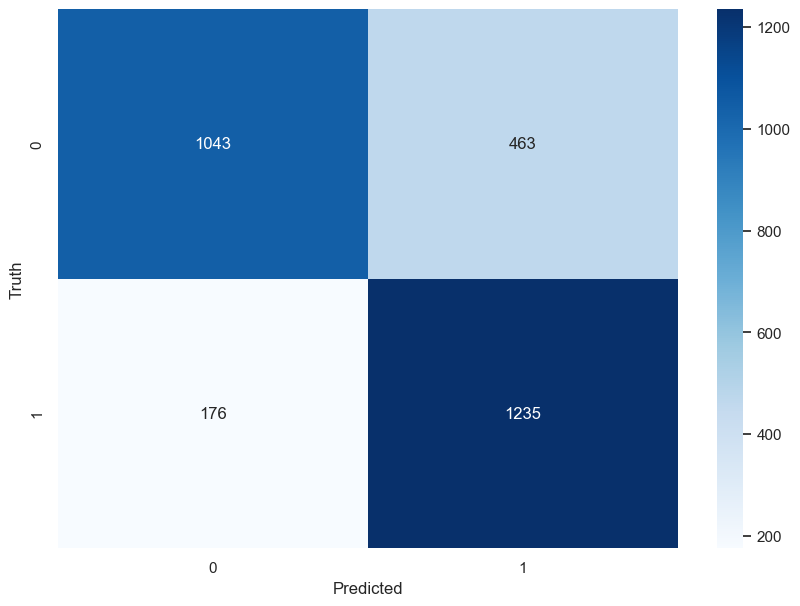

In [98]:
import seaborn as sns
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

980 instances were truly "Died" (True Died), and the model correctly predicted them as "Died" (Predicted Died). 477 instances were truly "Died" (True Died), but the model incorrectly predicted them as "Survived" (Predicted Survived). 187 instances were truly "Survived" (True Survived), but the model incorrectly predicted them as "Died" (Predicted Died). 1273 instances were truly "Survived" (True Survived), and the model correctly predicted them as "Survived" (Predicted Survived).

In [99]:
#predictive score of the model on the test data
bnb.score(X_test, y_test)

0.780939321220432

In [100]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1506
           1       0.73      0.88      0.79      1411

    accuracy                           0.78      2917
   macro avg       0.79      0.78      0.78      2917
weighted avg       0.79      0.78      0.78      2917

